In [49]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
def buildTrain(train, pastDay=1, futureDay=1):
    X_train, Y_train = [], []
    for i in range(train.shape[0]-futureDay-pastDay+1):
        X_train.append(np.array(train.iloc[i:i+pastDay]))
        Y_train.append(np.array(train.iloc[i+pastDay:i+pastDay+futureDay]["high"]))
    return np.array(X_train), np.array(Y_train)
def shuffle(X,Y):
    np.random.seed()
    randomList = np.arange(X.shape[0])
    np.random.shuffle(randomList)
    return X[randomList], Y[randomList]
def splitData(X,Y,rate):
    X_train = X[int(X.shape[0]*rate):]
    Y_train = Y[int(Y.shape[0]*rate):]
    X_val = X[:int(X.shape[0]*rate)]
    Y_val = Y[:int(Y.shape[0]*rate)]
    return X_train, Y_train, X_val, Y_val
train = pd.read_csv(r"C:\Users\admin\Desktop\Project\data\台北一\蔬果\奇異果-進口.csv")
train=train.drop(["Unnamed: 0"], axis=1)
train=train.drop(["crop_name"], axis=1)
train=train.drop(["crop_num"], axis=1)
train=train.drop(["market_name"], axis=1)
train=train.drop(["market_num"], axis=1)
temp=train
train= train.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
train_x1,train_y1=buildTrain(train)
train_x2,train_y2=buildTrain(temp)
train_x,train_y=train_x1,train_y2
train_x,train_y = shuffle(train_x,train_y)
train_x,train_y, val_x, val_y = splitData(train_x,train_y, 0.1)
model = Sequential()
model.add(LSTM(30, input_length=train_x.shape[1],input_dim= train_x.shape[2],return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(30))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
callback = EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
model.fit(train_x,train_y, epochs=300, batch_size=16, validation_split=0.1, callbacks=[callback])

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:41: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(30, return_sequences=True, input_shape=(1, 9))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 1, 30)             4800      
_________________________________________________________________
dropout_19 (Dropout)         (None, 1, 30)             0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 12,151
Trainable params: 12,151
Non-trainable params: 0
_________________________________________________________________
Train on 1732 samples, validate on 193 samples
Epoch 1/300
1732/1732 [==============================] - 3s 2ms/step - loss: 12628.5363 - v

Epoch 65/300
1732/1732 [==============================] - 0s 147us/step - loss: 986.2524 - val_loss: 1606.2295
Epoch 66/300
1732/1732 [==============================] - 0s 157us/step - loss: 980.1636 - val_loss: 1594.3902
Epoch 67/300
1732/1732 [==============================] - 0s 141us/step - loss: 988.6165 - val_loss: 1583.8115
Epoch 68/300
1732/1732 [==============================] - 0s 140us/step - loss: 1004.8398 - val_loss: 1572.6646
Epoch 69/300
1732/1732 [==============================] - 0s 142us/step - loss: 973.1266 - val_loss: 1566.2004
Epoch 70/300
1732/1732 [==============================] - 0s 140us/step - loss: 958.8860 - val_loss: 1558.2052
Epoch 71/300
1732/1732 [==============================] - 0s 141us/step - loss: 985.8795 - val_loss: 1550.3442
Epoch 72/300
1732/1732 [==============================] - 0s 143us/step - loss: 937.7473 - val_loss: 1544.4321
Epoch 73/300
1732/1732 [==============================] - 0s 154us/step - loss: 960.1145 - val_loss: 1535.4263


(213,)


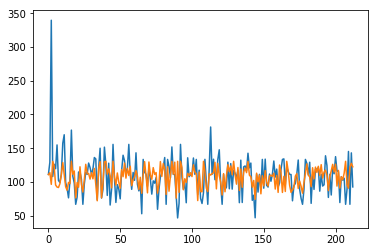

In [50]:
import matplotlib.pyplot as plt
a=range(0,val_y.shape[0])
val_y=val_y.reshape(-1)
plt.plot(a,val_y)
b=[]
for i in range(0,val_x.shape[0]):
    temp=val_x[i]
    temp=temp.reshape(1,1,9)
    z=model.predict(temp, verbose=0)
    b.append(z)
b=np.array(b)
b=b.reshape(-1)
print(b.shape)
plt.plot(a,b)
plt.show()